In [1]:
#NSForest (https://github.com/BAevermann/NSForest)
import pandas as pd
import numpy as np
import scanpy as sc

from NSForest_v3dot9_1 import *

In [2]:
data_folder = "/working_dir/objects/snRNA/"
adata = sc.read_h5ad(data_folder + "snRNA_NSForest2.h5ad") #<---

In [3]:
adata

AnnData object with n_obs × n_vars = 103255 × 35158
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rpl', 'percent.rps', 'sample', 'diagnosis', 'sex', 'chemistry', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.6', 'seurat_clusters', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'RNA_snn_res.0.8', 'RNA_snn_res.2.2', 'RNA_snn_res.2', 'celltype_clusters', 'class_clusters', 'diagnosis_class', 'diagnosis_subclass', 'subclass_clusters', 'oligo', 'RNA_snn_res.1.4', 'in4', 'endo_vlmc'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'harmony', 'umap'

In [4]:
cluster_header = "subclass_clusters" #<---

In [5]:
set(adata.obs[cluster_header])

{'Astro1',
 'Astro2',
 'Endo',
 'L2/3_IT_1',
 'L2/3_IT_2',
 'L4/5_IT',
 'L4_IT',
 'L5/6_NP',
 'L5_ET',
 'L5_IT',
 'L6_IT',
 'L6_IT_Car3',
 'L6b_CT',
 'Micro-PVM',
 'OPC',
 'Oligo',
 'T-cells',
 'VLMC',
 'in_CXCL14',
 'in_LAMP5',
 'in_PAX6',
 'in_PVALB_Ch',
 'in_SNCG',
 'in_SST',
 'in_VIP'}

In [6]:
NSForest_results = NSForest(adata, cluster_header=cluster_header, n_trees=100, n_genes_eval=6)

Preparing data...
--- 6.919445991516113 seconds ---
Calculating medians...
--- 63.14096713066101 seconds ---
Number of clusters to evaluate: 25
1 out of 25:
	Oligo
	['TMEM144', 'PLP1']
	0.9687137891077637
2 out of 25:
	OPC
	['MEGF11', 'LHFPL3']
	0.954433497536946
3 out of 25:
	Astro1
	['COL5A3', 'AL137139.2']
	0.7967587337621391
4 out of 25:
	Astro2
	['TNC', 'AC012405.1']
	0.7626141704353995
5 out of 25:
	VLMC
	['COL1A2']
	0.8084824387011267
6 out of 25:
	Endo
	Only 9 out of 15 top Random Forest features with median > 0 will be further evaluated.
	['ABCB1']
	0.8320251177394034
7 out of 25:
	T-cells
	Only 9 out of 15 top Random Forest features with median > 0 will be further evaluated.
	['SKAP1']
	0.8173784977908689
8 out of 25:
	Micro-PVM
	['ADAM28']
	0.9280686317641882
9 out of 25:
	L2/3_IT_1
	['AP000829.1', 'COL5A2']
	0.7836686390532545
10 out of 25:
	L2/3_IT_2
	['LINC02306', 'PDGFD']
	0.6524060811659756
11 out of 25:
	L4_IT
	['GABRG1', 'VWC2L', 'LRMP']
	0.70064874884152
12 out of 25

In [7]:
NSForest_results

,clusterName,f_score,PPV,TN,FP,FN,TP,marker_count,NSForest_markers,binary_genes
0,Oligo,0.968714,0.991671,59558,323,4918,38456,2,"[TMEM144, PLP1]","[MOG, FAM107B, MOBP, TF, TMEM144, PLP1, RNF220..."
1,OPC,0.954433,0.997456,95050,17,1523,6665,2,"[MEGF11, LHFPL3]","[AC004852.2, BEST3, SMOC1, SEMA5A, MEGF11, LHF..."
2,Astro1,0.796759,0.854293,89884,1293,4497,7581,2,"[COL5A3, AL137139.2]","[COL5A3, GJA1, FGFR3, AL137139.2, MRVI1, STON2..."
3,Astro2,0.762614,0.916356,99329,157,2049,1720,2,"[TNC, AC012405.1]","[TNC, AC012405.1, AC073941.1, WDR49, PFKFB2, G..."
4,VLMC,0.808482,0.862191,102839,39,133,244,1,[COL1A2],"[TBX18, DCN, COL1A2, AC092957.1, ITIH5, LAMA2,..."
5,Endo,0.832025,0.905983,103075,11,63,106,1,[ABCB1],"[CLDN5, FLT1, EPAS1, ANO2, VWF, ABCB1, ELOVL7,..."
6,T-cells,0.817378,0.888000,103062,14,68,111,1,[SKAP1],"[SKAP1, ITK, ETS1, SLFN12L, CD247, IKZF3, PRKC..."
7,Micro-PVM,0.928069,0.961267,97911,170,955,4219,1,[ADAM28],"[RBM47, AL163541.1, TBXAS1, ADAM28, LINC01374,..."
8,L2/3_IT_1,0.783669,0.845722,97186,604,2154,3311,2,"[AP000829.1, COL5A2]","[ROS1, AC117453.1, AP000829.1, COL5A2, GRB14, ..."
9,L2/3_IT_2,0.652406,0.758860,97625,660,2893,2077,2,"[LINC02306, PDGFD]","[LINC02306, AC008574.1, WNT3, PDGFD, LAMP5, AC..."


In [8]:
## store cluster-marker information in a dictionary
markers = dict(zip(NSForest_results['clusterName'], NSForest_results['NSForest_markers']))

         Falling back to preprocessing with `sc.pp.pca` and default params.


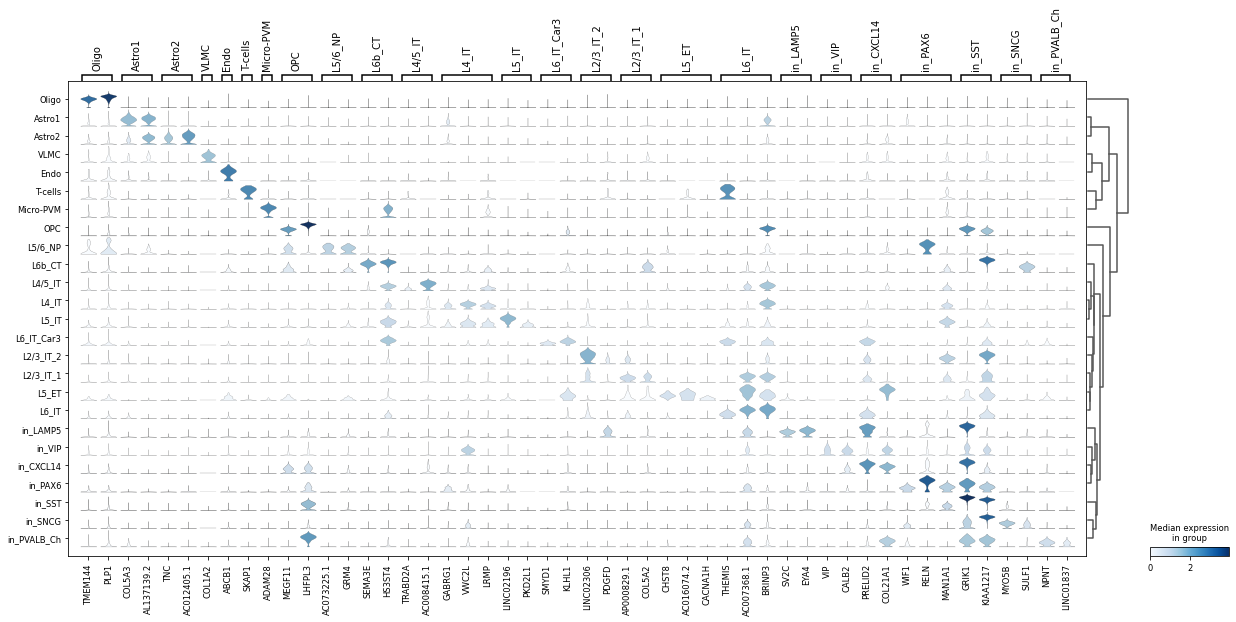

In [9]:
## use scanpy plot function to plot the marker genes
sc.pl.stacked_violin(adata, markers, groupby=cluster_header, dendrogram=True)

In [10]:
binary_genes = dict(zip(NSForest_results['clusterName'], NSForest_results['binary_genes']))

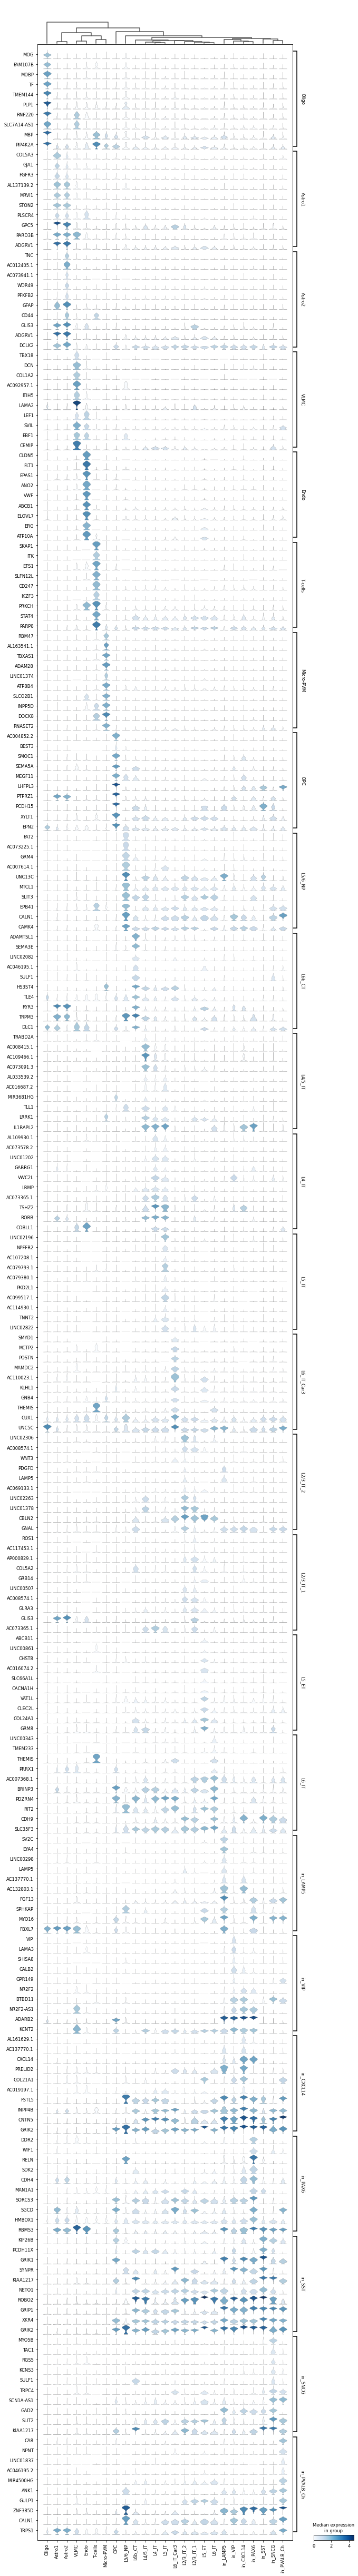

In [11]:
sc.pl.stacked_violin(adata, binary_genes, groupby=cluster_header, dendrogram=True, swap_axes=True)

In [13]:
!python3 --version

Python 3.10.6


In [14]:
sc.__version__

'1.9.3'